In [107]:
import pandas as pd
import random
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

MAX_INT = 10000
Q = 100 # point number
P = [0.5, 1, 2, 5, MAX_INT]
DIMENSIONS = [2,3,4,5 ] + [i * 10 for i in range(1,11)]
eps = 0.1 ** 10

def serialize(vec: [float], dim: int) -> pd.Series:
    vec_json = {}
    for d in range(0,dim):
        vec_json[f'd{d+1}'] = vec[d]
    return vec_json

def generate_vector(dim: int) -> pd.Series:
    vec = [0]
    while sum(vec) == 0.0:
        vec = [random.randint(0,MAX_INT) / MAX_INT for i in range(0, dim)]
    return serialize(vec, dim)

def generate_data_set(dim: int) -> pd.DataFrame:
    vecs = []
    for i in range(0,Q):
        vecs.append(generate_vector(dim))
    return pd.DataFrame(data=vecs)
        
def distance(vec1: pd.Series, vec2: pd.Series, p: float):
    return (np.sum([abs(a-b)**p for a, b in zip(vec1, vec2)])) ** (1/p)

def get_zero_vector(dim: int):
    return pd.Series(serialize([0.0] * dim ,dim))

def calculate_distances(df: pd.DataFrame):
    zero_vector = get_zero_vector(df.shape[1])
    for p in P:
        df[f'distp{p}'] = df.apply(lambda x: distance(x, zero_vector, p), axis=1)
    return df


def calc_statistics(df: pd.DataFrame):
    # minimum, maximum, mean, variance, relative contrast
    stats = {}
    for p in P:
        key = f'distp{p}'
        minp = df[key].min()
        maxp = df[key].max()
        varp = df[key].var()
        meanp = df[key].mean()
        relcontrastp = round((maxp - minp) / (minp + eps), 4)
        stats[key] = [minp, maxp, meanp, varp, relcontrastp]
    return stats


datasets = []

data_set = generate_data_set(10)


data_set = calculate_distances(data_set)

calc_statistics(data_set)


{'distp0.5': [24.28518192291998,
  73.77677162742872,
  44.97441721795911,
  87.39918940877816,
  2.0379],
 'distp1': [2.9919, 7.5973, 5.002556, 0.7350976839030304, 1.5393],
 'distp2': [1.1298887024835675,
  2.489289812376213,
  1.809212948831667,
  0.06242987109073138,
  1.2031],
 'distp5': [0.7027854225382675,
  1.3233307490248523,
  1.0859287772806412,
  0.013706566430004327,
  0.883],
 'distp10000': [0.0,
  0.9994,
  0.5426780007634542,
  0.2339961363450637,
  9994000000.0]}

In [108]:
N = 100 # number of datasets

def average_stats(stats_combined: [dict], dim: int):
    avg_stats = [] #headers=['dim', 'p', 'min', 'max', 'mean', 'var', 'rel_contrast']
    stat_qty = len(stats_combined)
    for p in P:
        pstats = [0,0,0,0,0,0]
        pkey = f'distp{p}' 
        for i in range(0,5):
            for stat in stats_combined:
                pstats[i] += stat[pkey][i]
        avg_stats.append({
            'dim': dim,
            'p': p,
            'min': pstats[0] / stat_qty,
            'max': pstats[1] / stat_qty,
            'mean': pstats[2] / stat_qty,
            'var': pstats[3] / stat_qty,
            'rel_contrast': pstats[4] / stat_qty
        })
    return avg_stats

stats_dim = [] 
for dim in DIMENSIONS:
    stats_gathered = []
    for _ in range(0, N):
        data_set = generate_data_set(dim)
        data_set = calculate_distances(data_set)
        stats_gathered.append(calc_statistics(data_set))
    stats_dim = stats_dim + average_stats(stats_gathered, dim)

stats_ready = pd.DataFrame(stats_dim)

stats_ready

,dim,p,min,max,mean,var,rel_contrast
0,2,0.5,0.218628,3.745008,1.890004,0.732026,2.259809e+01
1,2,1.0,0.130370,1.873610,1.000373,0.166856,1.868132e+01
2,2,2.0,0.105701,1.326400,0.765404,0.081231,1.607583e+01
3,2,5.0,0.095862,1.081893,0.685717,0.059474,1.419217e+01
4,2,10000.0,0.000000,0.995485,0.134547,0.111234,9.954850e+09
...,...,...,...,...,...,...,...
65,100,0.5,3677.165906,5236.485261,4445.281599,96990.246686,4.257050e-01
66,100,1.0,42.721500,57.048192,49.948309,8.237248,3.365800e-01
67,100,2.0,5.093549,6.381653,5.762093,0.066748,2.537710e-01
68,100,5.0,1.607220,1.876077,1.751031,0.002865,1.677430e-01


/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

<Axes: xlabel='dim', ylabel='rel_contrast'>

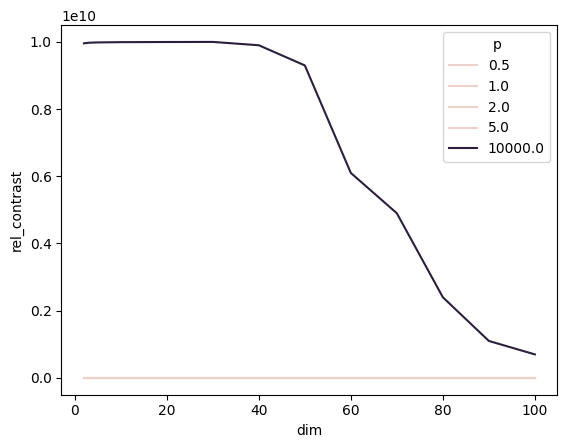

In [109]:
sn.lineplot(stats_ready, x='dim', y='rel_contrast', hue='p')

/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='dim', ylabel='value'>

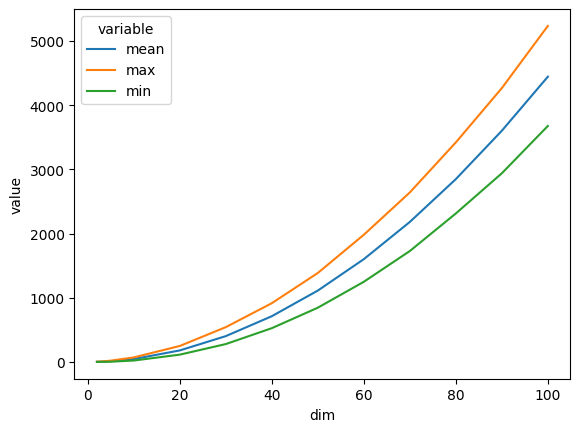

In [110]:
t = stats_ready.loc[stats_ready['p'] == 0.5]
sn.lineplot(x='dim', y='value', hue='variable', 
             data=pd.melt(t[['dim', 'mean', 'max', 'min']], ['dim']))

/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='dim', ylabel='value'>

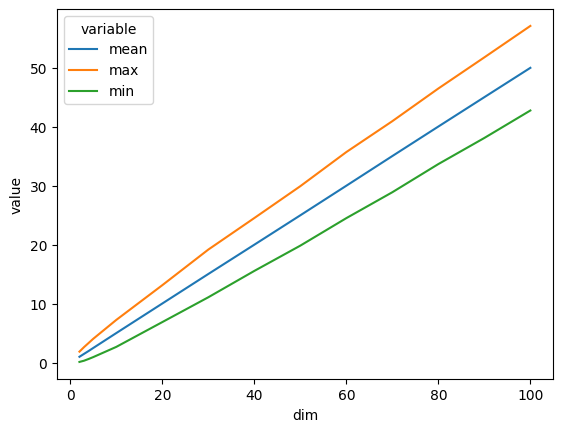

In [111]:
t = stats_ready.loc[stats_ready['p'] == 1]
sn.lineplot(x='dim', y='value', hue='variable', 
             data=pd.melt(t[['dim', 'mean', 'max', 'min']], ['dim']))

/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='dim', ylabel='value'>

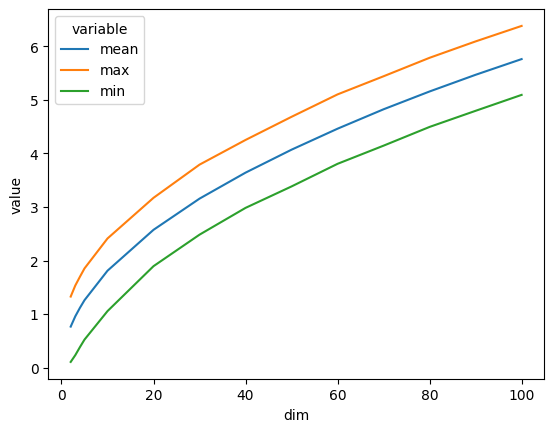

In [112]:
t = stats_ready.loc[stats_ready['p'] == 2]
sn.lineplot(x='dim', y='value', hue='variable', 
             data=pd.melt(t[['dim', 'mean', 'max', 'min']], ['dim']))

/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='dim', ylabel='value'>

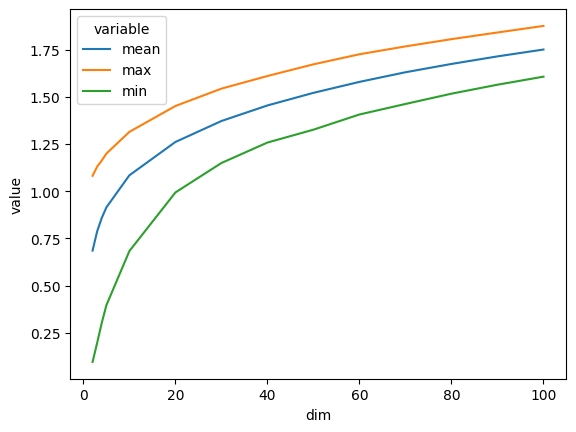

In [113]:
t = stats_ready.loc[stats_ready['p'] == 5]
sn.lineplot(x='dim', y='value', hue='variable', 
             data=pd.melt(t[['dim', 'mean', 'max', 'min']], ['dim']))

/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

<Axes: xlabel='dim', ylabel='value'>

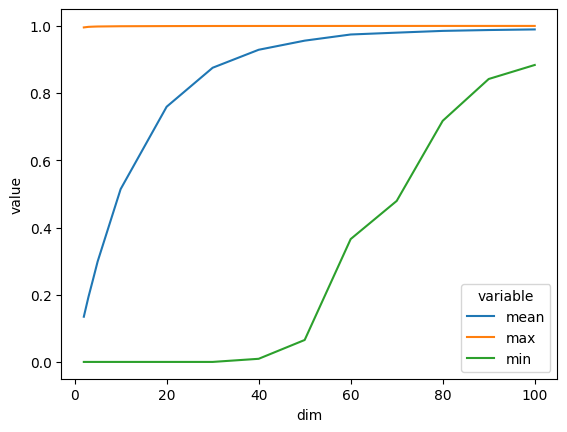

In [114]:
t = stats_ready.loc[stats_ready['p'] == MAX_INT]
sn.lineplot(x='dim', y='value', hue='variable', 
             data=pd.melt(t[['dim', 'mean', 'max', 'min']], ['dim']))

/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

<Axes: xlabel='dim', ylabel='var'>

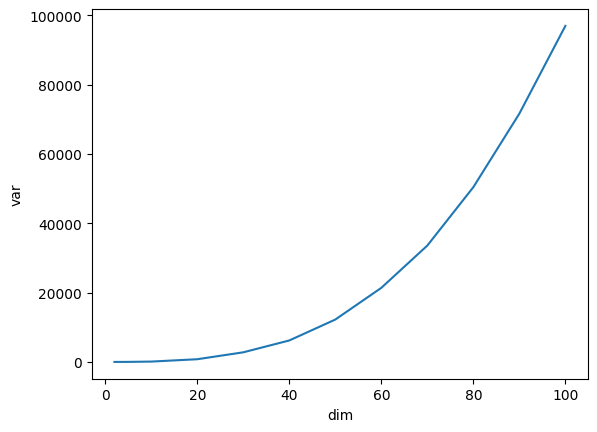

In [116]:
t = stats_ready.loc[stats_ready['p'] == 0.5]
sn.lineplot(x='dim', y='var', data=t)

/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

<Axes: xlabel='dim', ylabel='var'>

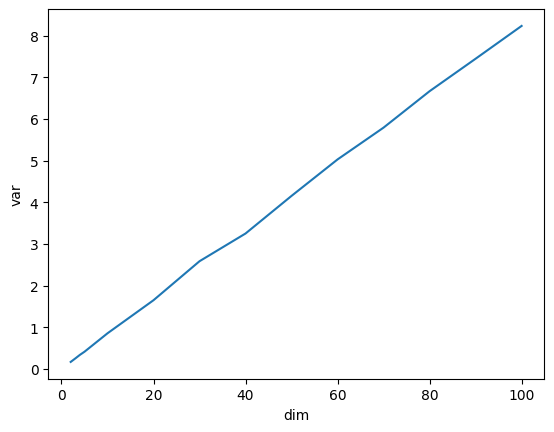

In [117]:
t = stats_ready.loc[stats_ready['p'] == 1]
sn.lineplot(x='dim', y='var', data=t)

/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

<Axes: xlabel='dim', ylabel='var'>

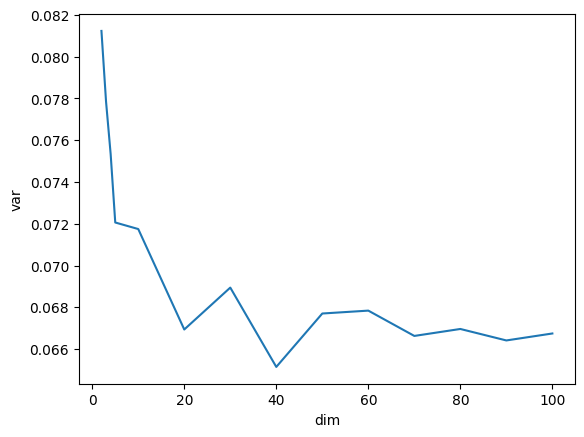

In [118]:
t = stats_ready.loc[stats_ready['p'] == 2]
sn.lineplot(x='dim', y='var', data=t)

/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

<Axes: xlabel='dim', ylabel='var'>

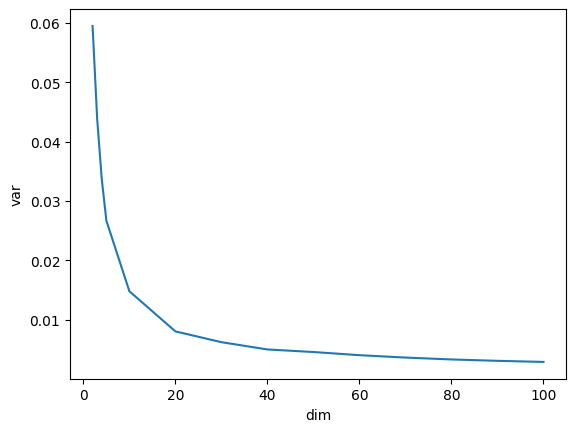

In [119]:
t = stats_ready.loc[stats_ready['p'] == 5]
sn.lineplot(x='dim', y='var', data=t)

/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/patrik/Documents/Aalto/DataMining/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na 

<Axes: xlabel='dim', ylabel='var'>

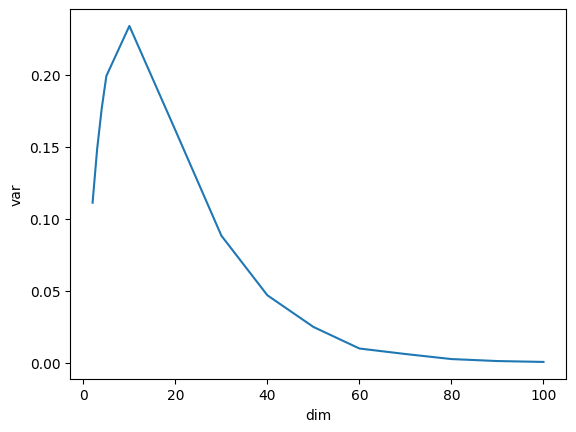

In [120]:
t = stats_ready.loc[stats_ready['p'] == MAX_INT]
sn.lineplot(x='dim', y='var', data=t)